In [1]:
%matplotlib inline
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("Merged data draft 3 rows 10 to 60.csv")
df

,Unnamed: 0,Sample Number,Lubrication Condition,Pin Material,Weight (kg),RPM,Sensor,Name of file,wear,friction
0,0,1,No Lubrication,Brass,8,100,Piezo,Piezo_1,65.437059,13.327255
1,1,2,No Lubrication,Brass,8,150,Piezo,Piezo_2,31.882353,15.288431
2,2,3,No Lubrication,Brass,8,200,Piezo,Piezo_3,142.660784,14.579804
3,3,4,No Lubrication,Brass,8,250,Piezo,Piezo_4,126.095490,16.159608
4,4,5,No Lubrication,Brass,9,100,Piezo,Piezo_5,44.859804,19.828235
...,...,...,...,...,...,...,...,...,...,...
91,91,92,Full Lubrication,Aluminium,4,250,Piezo,Piezo_92,44.207059,2.781176
92,92,93,Full Lubrication,Aluminium,5,100,Piezo,Piezo_93,75.374902,4.973137
93,93,94,Full Lubrication,Aluminium,5,150,Piezo,Piezo_94,84.913725,4.588627
94,94,95,Full Lubrication,Aluminium,5,200,Piezo,Piezo_95,131.948824,4.297255


In [3]:
i = 20 # sample number
di = pd.read_csv(f"Data orig/Piezo_{i}.dwf", sep=";", names=["timestamp", "wear", "friction", "const", "ignore"])
di

,timestamp,wear,friction,const,ignore
0,0.922,247.16,25.30,102.54,NaN
1,1.828,247.45,25.52,102.54,NaN
2,2.734,249.57,25.54,102.54,NaN
3,3.641,249.42,25.45,102.54,NaN
4,4.547,251.38,25.44,102.54,NaN
...,...,...,...,...,...
103,94.594,303.62,26.24,102.54,NaN
104,95.500,301.52,25.68,102.54,NaN
105,96.422,301.95,26.13,102.53,NaN
106,97.328,300.48,26.65,102.54,NaN


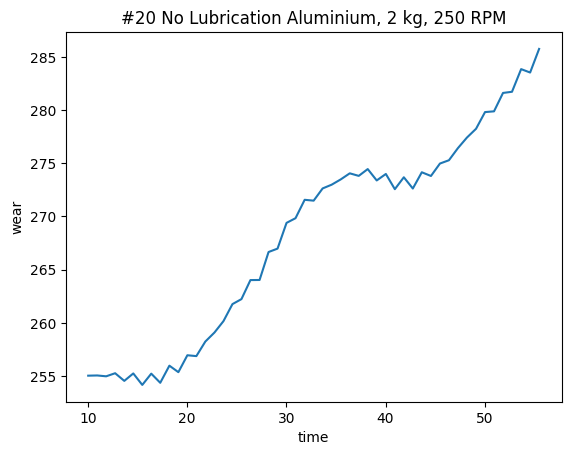

In [4]:
s, e = 10, 60
plt.figure()

plt.plot(di["timestamp"].loc[s:e], di["wear"].loc[s:e])

lub = df["Lubrication Condition"].loc[i - 1]
mat = df["Pin Material"].loc[i - 1]
wt = df["Weight (kg)"].loc[i - 1]
rpm = df["RPM"].loc[i - 1]
plt.title(f"#{i} {lub} {mat}, {wt} kg, {rpm} RPM")

plt.xlabel("time")
plt.ylabel("wear")

plt.show()

In [5]:
df.loc[i-1]

Unnamed: 0                           19
Sample Number                        20
Lubrication Condition    No Lubrication
Pin Material                  Aluminium
Weight (kg)                           2
RPM                                 250
Sensor                            Piezo
Name of file                   Piezo_20
wear                         116.531569
friction                       5.807647
Name: 19, dtype: object

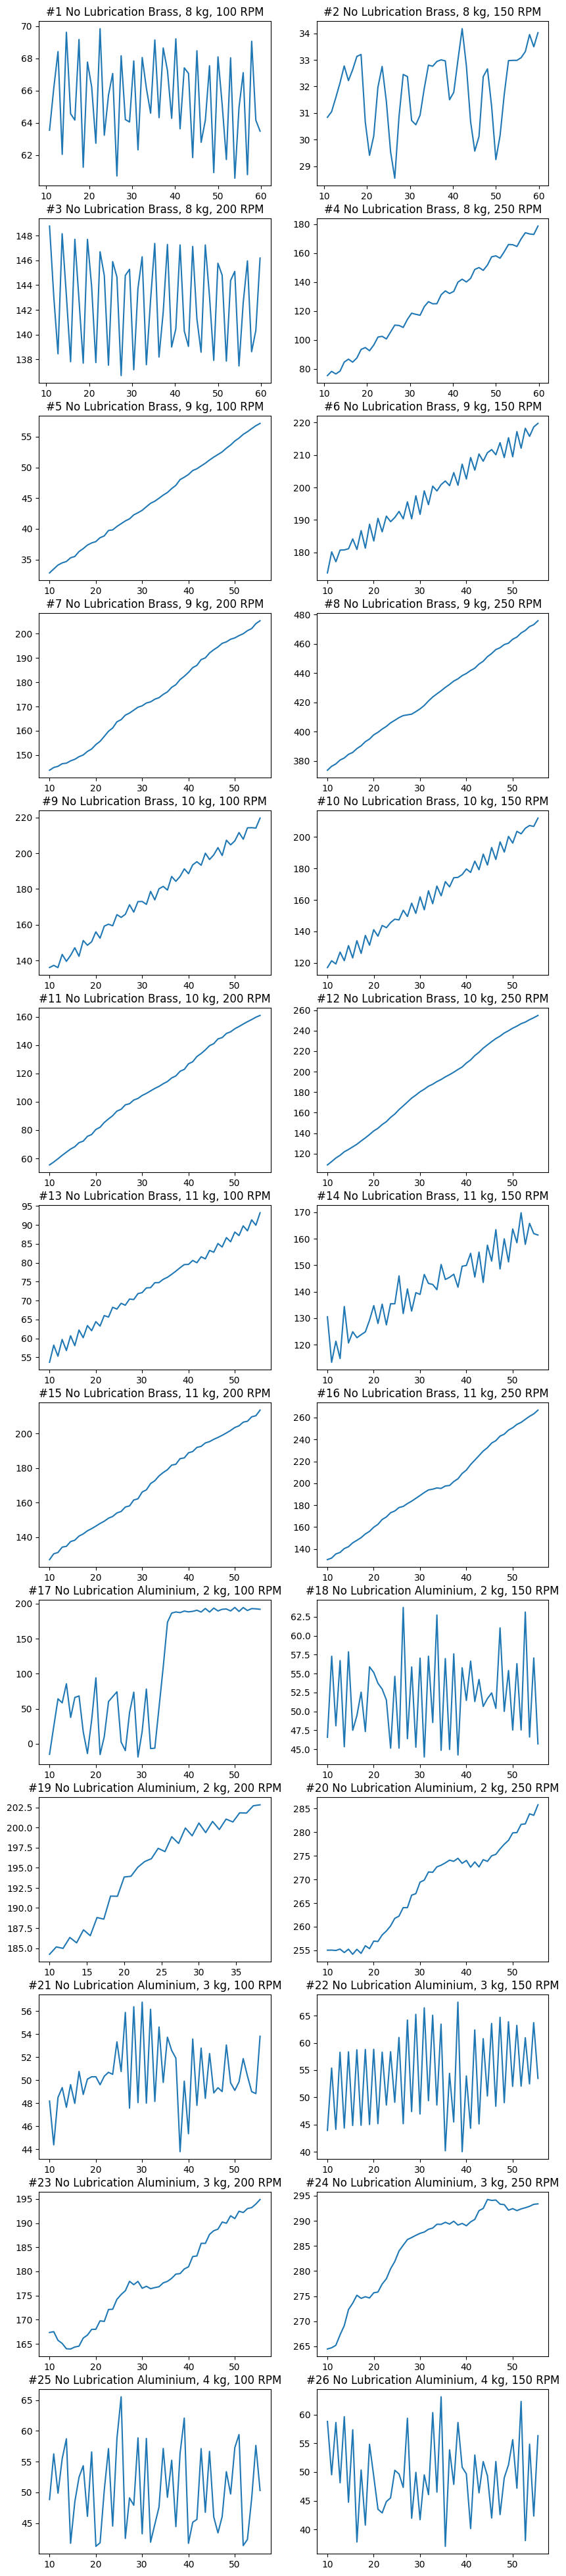

In [16]:
TS, TE = 10, 60
ROWS = 13
COLS = 2
fig, axs = plt.subplots(ROWS, COLS, figsize=(10, 50))
for i in range(ROWS):
    for j in range(COLS):
        sn = j + i * COLS + 1
        dsn = pd.read_csv(f"Data orig/Piezo_{sn}.dwf", sep=";", names=["timestamp", "wear", "friction", "const", "ignore"])
        
        axs[i, j].plot(dsn["timestamp"].loc[TS:TE], dsn["wear"].loc[TS:TE])

        lub = df["Lubrication Condition"].loc[sn - 1]
        mat = df["Pin Material"].loc[sn - 1]
        wt = df["Weight (kg)"].loc[sn - 1]
        rpm = df["RPM"].loc[sn - 1]
        axs[i, j].set_title(f"#{sn} {lub} {mat}, {wt} kg, {rpm} RPM")

        # axs[i, j].xlabel("time")
        # axs[i, j].ylabel("wear")